<a href="https://colab.research.google.com/github/Segrey372017/cities_stat/blob/main/city_stat2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
from lightgbm import LGBMRegressor

# Загрузка и очистка данных

In [14]:
!wget -O /content/cities_stat2020.xlsx https://github.com/Segrey372017/cities_stat/blob/main/cities_stat2020.xlsx?raw=true

--2022-08-10 08:23:27--  https://github.com/Segrey372017/cities_stat/blob/main/cities_stat2020.xlsx?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Segrey372017/cities_stat/raw/main/cities_stat2020.xlsx [following]
--2022-08-10 08:23:27--  https://github.com/Segrey372017/cities_stat/raw/main/cities_stat2020.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Segrey372017/cities_stat/main/cities_stat2020.xlsx [following]
--2022-08-10 08:23:27--  https://raw.githubusercontent.com/Segrey372017/cities_stat/main/cities_stat2020.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443..

In [15]:
df = pd.read_excel('/content/cities_stat2020.xlsx')

In [16]:
df.head()

,Регион,Муниципалитет,ССЧ_чел,СредняяЗарплата_руб,Отгрузка_млн_руб,ОборотТорговли_млн_руб,БюджетРасходы_млн_руб,Инвестиции_млн_руб
0,Ивановская,Вичуга,4644,24362.5,1569.9801,1938.6381,728.6035,204.065
1,Ивановская,Кинешма,12075,27299.0,7772.1423,4852.5725,1977.6431,995.331
2,Ивановская,Кохма,2733,27163.4,2937.9856,1700.0135,630.7619,467.665
3,Ивановская,Тейково,5395,27988.7,6710.2328,2309.6860,758.5690,275.265
4,Ивановская,Шуя,9402,30067.4,24950.8141,4104.0293,1188.5295,863.467


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Регион                  68 non-null     object 
 1   Муниципалитет           68 non-null     object 
 2   ССЧ_чел                 68 non-null     int64  
 3   СредняяЗарплата_руб     68 non-null     float64
 4   Отгрузка_млн_руб        68 non-null     float64
 5   ОборотТорговли_млн_руб  68 non-null     float64
 6   БюджетРасходы_млн_руб   68 non-null     float64
 7   Инвестиции_млн_руб      62 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.4+ KB


In [18]:
df.describe()

,ССЧ_чел,СредняяЗарплата_руб,Отгрузка_млн_руб,ОборотТорговли_млн_руб,БюджетРасходы_млн_руб,Инвестиции_млн_руб
count,68.000000,68.000000,68.000000,68.000000,68.000000,62.000000
mean,12877.779412,34517.510294,34688.180706,5078.557775,1844.546884,3447.620306
std,12032.665673,7686.802720,51781.509944,5591.837927,1713.315022,6175.213816
min,1866.000000,24362.500000,407.070500,553.083000,261.684100,39.935000
25%,5075.500000,29316.375000,5387.134600,1682.883550,803.925175,442.624000
50%,8491.500000,32270.000000,10926.647150,3447.332550,1312.376500,929.399000
75%,15054.750000,37180.325000,42147.839225,5900.468300,2335.706750,3465.825250
max,64793.000000,59152.200000,281343.335800,29349.209800,9611.746800,30692.197000


In [19]:
df['Инвестиции_млн_руб'].isna().mean()

0.08823529411764706

In [20]:
data = df.dropna()

In [21]:
data.describe()

,ССЧ_чел,СредняяЗарплата_руб,Отгрузка_млн_руб,ОборотТорговли_млн_руб,БюджетРасходы_млн_руб,Инвестиции_млн_руб
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,13351.790323,35038.895161,37510.892663,5300.632085,1926.572945,3447.620306
std,12388.285559,7830.097138,53411.919604,5785.758868,1765.144669,6175.213816
min,1866.000000,24362.500000,407.070500,553.083000,261.684100,39.935000
25%,5205.000000,29491.550000,5622.500225,1665.874850,847.434450,442.624000
50%,9221.500000,33238.100000,13982.416700,3536.448500,1376.070450,929.399000
75%,15484.250000,38003.600000,44577.123875,6075.683900,2451.699650,3465.825250
max,64793.000000,59152.200000,281343.335800,29349.209800,9611.746800,30692.197000


In [22]:
data.columns

Index(['Регион', 'Муниципалитет', 'ССЧ_чел', 'СредняяЗарплата_руб',
       'Отгрузка_млн_руб', 'ОборотТорговли_млн_руб', 'БюджетРасходы_млн_руб',
       'Инвестиции_млн_руб'],
      dtype='object')

In [25]:
col_names = ['Region', 'City', 'WorkCount', 'AvgSalary',
       'Production', 'Retail', 'BudgetSpends',
       'Investment']

In [26]:
data.columns = col_names
data.head()

,Region,City,WorkCount,AvgSalary,Production,Retail,BudgetSpends,Investment
0,Ивановская,Вичуга,4644,24362.5,1569.9801,1938.6381,728.6035,204.065
1,Ивановская,Кинешма,12075,27299.0,7772.1423,4852.5725,1977.6431,995.331
2,Ивановская,Кохма,2733,27163.4,2937.9856,1700.0135,630.7619,467.665
3,Ивановская,Тейково,5395,27988.7,6710.2328,2309.6860,758.5690,275.265
4,Ивановская,Шуя,9402,30067.4,24950.8141,4104.0293,1188.5295,863.467


In [27]:
target_col = 'Investment'

In [28]:
feature_cols = ['WorkCount', 'AvgSalary', 'Production', 'Retail', 'BudgetSpends']

# Разведочный анализ данных

### Распределение целевой величины (Investment)

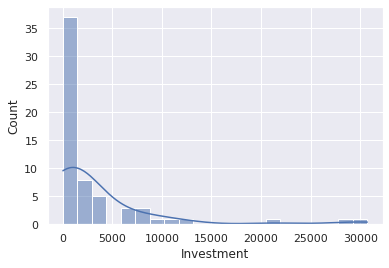

In [31]:
sns.histplot(data.Investment, kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


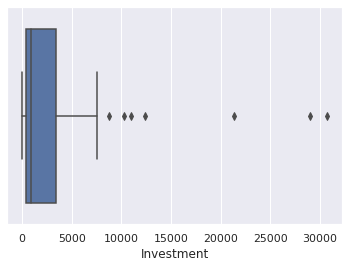

In [32]:
sns.boxplot(data.Investment)

In [33]:
data.Investment.describe()

count       62.000000
mean      3447.620306
std       6175.213816
min         39.935000
25%        442.624000
50%        929.399000
75%       3465.825250
max      30692.197000
Name: Investment, dtype: float64

invesment vs WorkCount


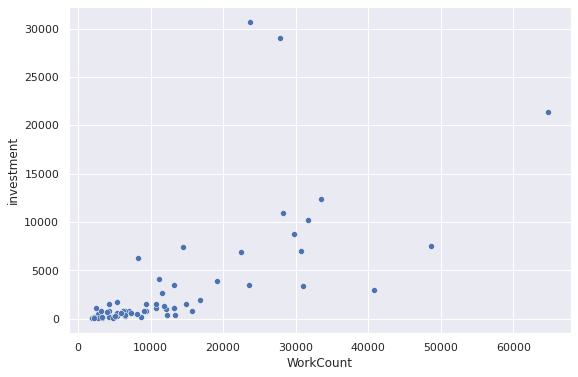

invesment vs AvgSalary


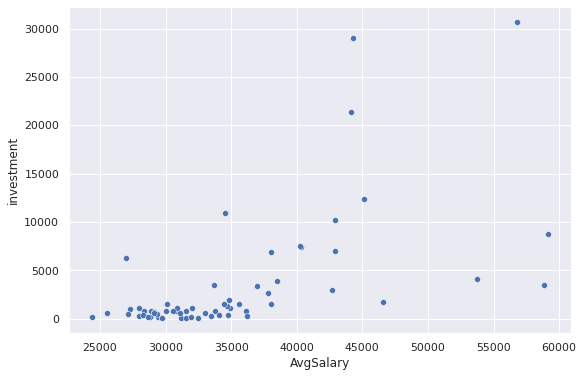

invesment vs Production


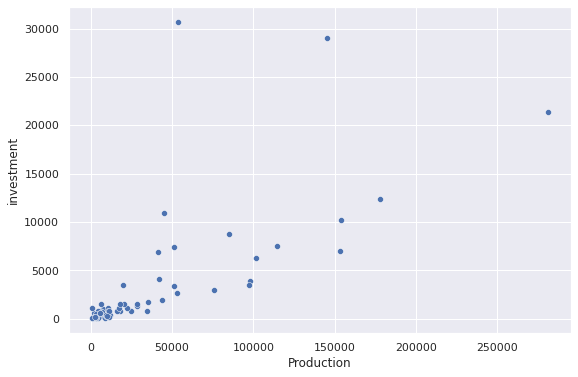

invesment vs Retail


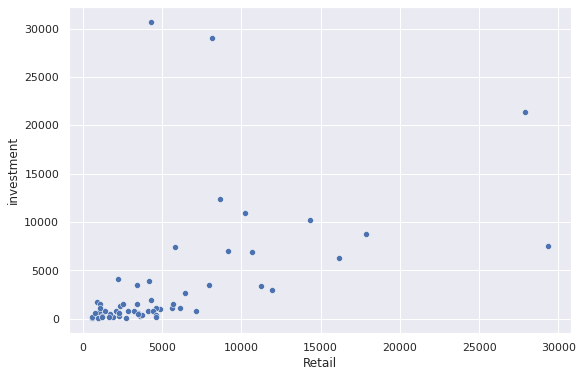

invesment vs BudgetSpends


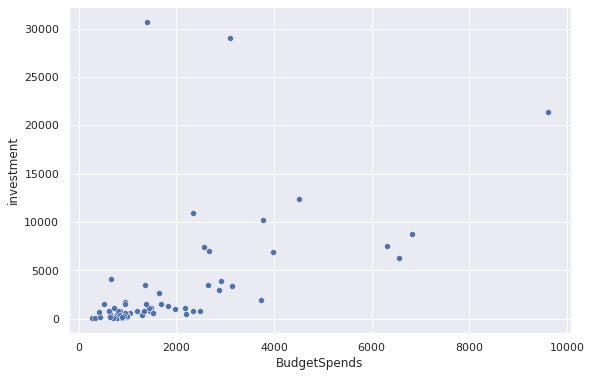

In [38]:
for feat in feature_cols:
    print(f"invesment vs {feat}")
    plt.figure(figsize = (9,6))
    sns.scatterplot(x = data[feat], y = data.Investment)
    plt.xlabel(feat)
    plt.ylabel('investment')
    plt.show()

### Распределение признаков

In [39]:
# описательная статистика для признаков
data[feature_cols].describe()

,WorkCount,AvgSalary,Production,Retail,BudgetSpends
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,13351.790323,35038.895161,37510.892663,5300.632085,1926.572945
std,12388.285559,7830.097138,53411.919604,5785.758868,1765.144669
min,1866.000000,24362.500000,407.070500,553.083000,261.684100
25%,5205.000000,29491.550000,5622.500225,1665.874850,847.434450
50%,9221.500000,33238.100000,13982.416700,3536.448500,1376.070450
75%,15484.250000,38003.600000,44577.123875,6075.683900,2451.699650
max,64793.000000,59152.200000,281343.335800,29349.209800,9611.746800


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

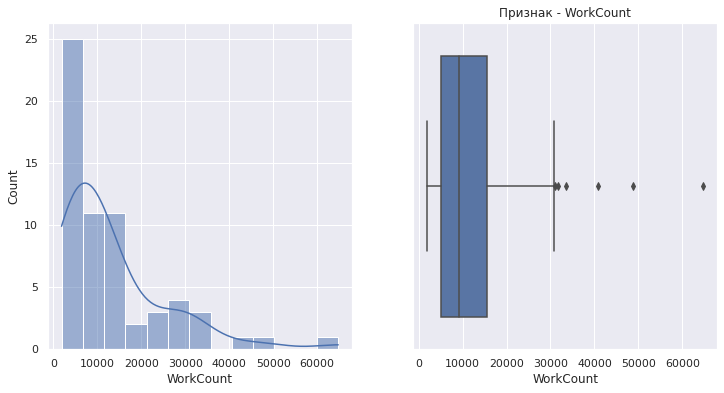

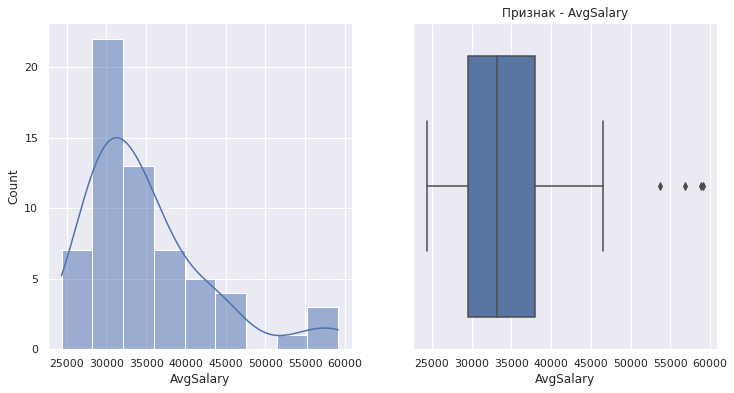

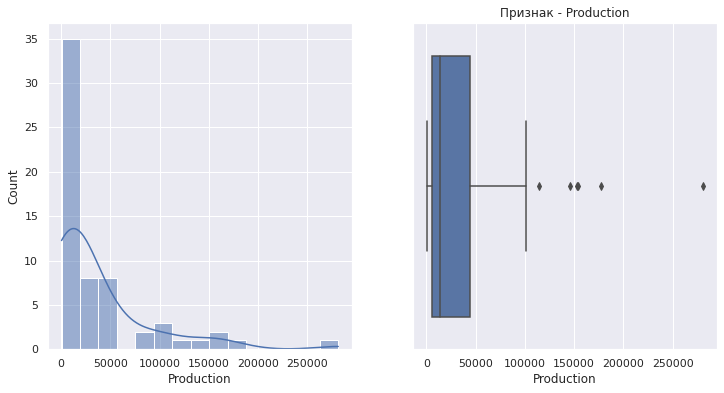

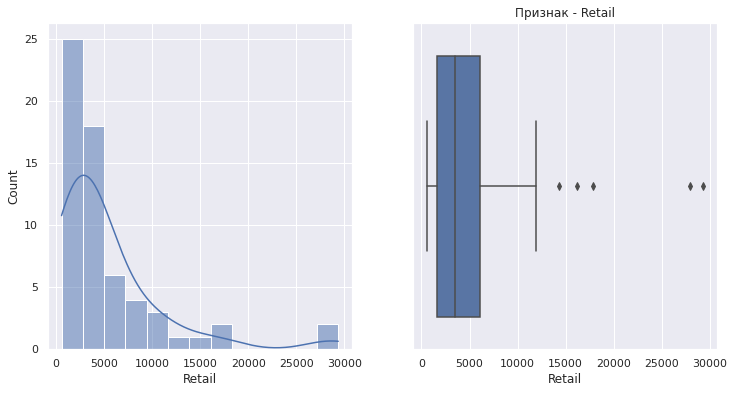

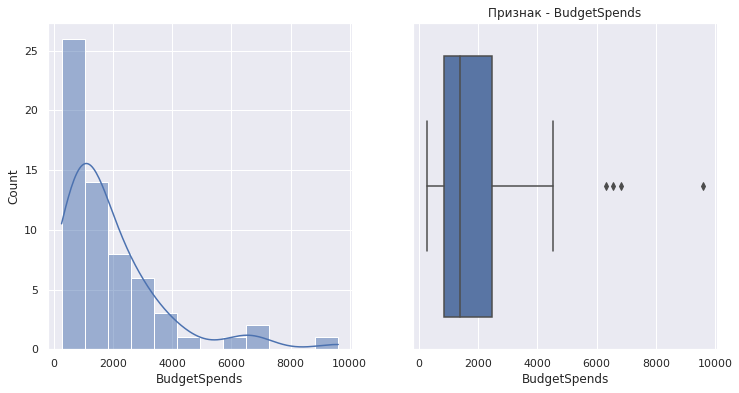

In [52]:
for feat in feature_cols:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
    plt.title(f'Признак - {feat}')
    sns.histplot(data[feat], kde = True, ax = ax1)
    sns.boxplot(data[feat], ax = ax2)